<a href="https://colab.research.google.com/github/Heleinef/Data-Science-Master_Heleine/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
**Team members: Heleine, Gabriel, Kossi, Victor**

# Instructions
Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?
You may work in a small group on the project.

Your code and analysis should be delivered in an IPython Notebook by end of day Sunday.

# About Dataset
This dataset consists of 'circles' (or 'lists') from Twitter. Twitter data was crawled from public sources. The dataset includes node features (profiles), circles, and ego networks.

Data is also available from Facebook and Google+.
Source: [http://snap.stanford.edu/data/ego-Twitter.html]Stanford Large Network Dataset Collection)
Citation: J. McAuley and J Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012.

# 1. Download the Dataset
We'll first load the ego-Twitter dataset. This dataset typically consists of nodes (Twitter users) and edges (relationships or interactions between users).



In [5]:
import tarfile
import requests
import os

# Define the URL of the dataset and the local filename
url = "https://snap.stanford.edu/data/twitter.tar.gz"
filename = "twitter.tar.gz"

# Download the dataset
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.raw.read())
else:
    print("Failed to download the dataset")

# Extract the dataset
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall()

# 2. Extract the zip file

In [2]:
# Download the Zip File

import requests

url = 'https://snap.stanford.edu/data/twitter.tar.gz'
filename = 'twitter.tar.gz'

response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.raw.read())
else:
    print("Failed to download the file")


In [3]:
# Extract the Zip File
import tarfile

# Extract the tar.gz file
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall(path='twitter_data')


# 3. Read and preprocess the Extracted Files
In this step we'll load one of the Twitter ego networks from the extracted files.
Then we'll create a weighted graph where nodes represent users and edges represent interactions with weights indicating the strength of these interactions.

In [12]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load one of the Twitter ego networks
data_dir = 'twitter_data/twitter'

# Check if the directory exists
if os.path.exists(data_dir):
    # List all files in the directory
    files = os.listdir(data_dir)
    # If the directory is not empty, proceed
    if files:
        # Select the first edge file in the directory
        ego_network_filename = os.path.join(data_dir, files[0])
        print("Using edge file:", ego_network_filename)

        # Read the edge list
        edges = pd.read_csv(ego_network_filename, sep=' ', names=['source', 'target'])
    else:
        print("Error: 'twitter_data/twitter' directory is empty. Check extraction process.")
else:
    print("Error: 'twitter_data/twitter' directory not found. Check extraction process.")

Using edge file: twitter_data/twitter/19933035.featnames


# 4. Create the Graph:
 In this step, a graph is created from the edge list, and random weights are assigned to edges.

In [13]:

# Create a graph
G = nx.from_pandas_edgelist(edges)

# Randomly assign weights to edges (for demonstration purposes, in a real scenario, use actual weights)
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.rand()

# Define a threshold for the island method
threshold = 0.7

# 5. Apply the Island Method
In this step We'll apply the island method by setting a threshold for the edge weights and retaining only the edges that meet or exceed this threshold.

In [14]:
# Apply the island method
strong_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= threshold]
H = G.edge_subgraph(strong_edges).copy()


# 6. Analyze the Reduced Network
In this step, we'll analyze the reduced network to identify distinct groups (communities) and infer their characteristics.

In [15]:
# Identify and analyze communities using the connected components
communities = list(nx.connected_components(H))

# 7. Visualize the Network
In this step we'll visualize the reduced network to better understand its structure.



Community 1:
Nodes: {'#HappyBdayJeremy', 12}
Size: 2

Community 2:
Nodes: {2, '#2'}
Size: 2

Community 3:
Nodes: {'@fbrstreetteam', 311}
Size: 2

Community 4:
Nodes: {'@XChadballX:', 281}
Size: 2

Community 5:
Nodes: {9, "#FF's,"}
Size: 2

Community 6:
Nodes: {"@ParamoreUK_IRE's", 212}
Size: 2

Community 7:
Nodes: {'@ParamoreWebCrew:', 219}
Size: 2

Community 8:
Nodes: {'#IThankGod', 14}
Size: 2

Community 9:
Nodes: {400, '@tweesles'}
Size: 2

Community 10:
Nodes: {16, '#Jerms'}
Size: 2

Community 11:
Nodes: {17, '#KONY2012'}
Size: 2

Community 12:
Nodes: {169, '@ParamoreBrazil'}
Size: 2

Community 13:
Nodes: {'@branchesbro', 301}
Size: 2

Community 14:
Nodes: {20, '#Parafamily'}
Size: 2

Community 15:
Nodes: {179, "@ParamoreEh's"}
Size: 2

Community 16:
Nodes: {'#StrangeClouds', 25}
Size: 2

Community 17:
Nodes: {'#disney', 34}
Size: 2

Community 18:
Nodes: {'@ellieparamore_:', 309}
Size: 2

Community 19:
Nodes: {'#nothing', 45}
Size: 2

Community 20:
Nodes: {'#follow', 37}
Size: 2

C

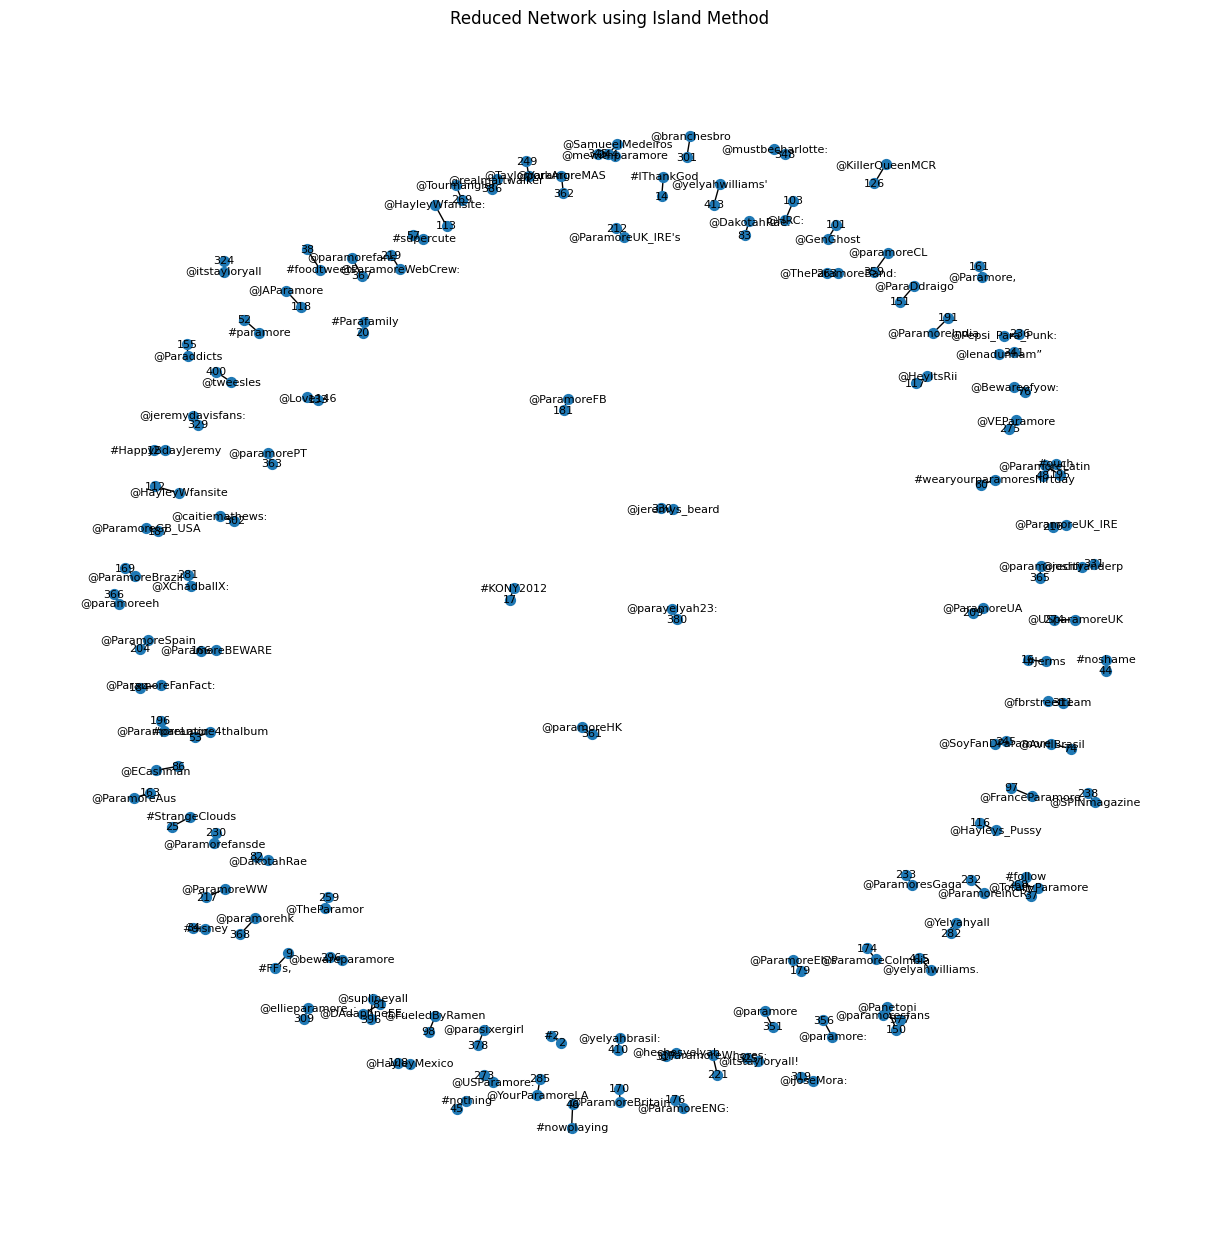

In [16]:
# Print and analyze each community
for i, community in enumerate(communities):
    print(f"Community {i+1}:")
    print(f"Nodes: {community}")
    print(f"Size: {len(community)}")
    print()

# Visualize the reduced network
pos = nx.spring_layout(H)
plt.figure(figsize=(12, 12))
nx.draw(H, pos, with_labels=True, node_size=50, font_size=8)
plt.title('Reduced Network using Island Method')
plt.show()

8. Inference:
By analyzing the distinct groups (communities) in the reduced network, we can infer community size, and the degree ofconnectivity.

- Community Size:  The number of nodes in each community.
- Connectivity: How tightly connected each community is, which can reveal the core influencers or key members within the network.

Overall, this analysis helps in understanding the core structure and key players in the network, providing insights into how information or influence flows within the Twitter ego network.